In [11]:
import warnings
warnings.filterwarnings("ignore")

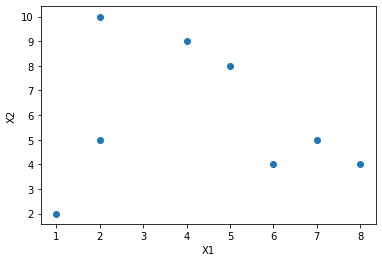

In [12]:
import numpy as np

data = [[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]]

x1 = [x[0] for x in data]
x2 = [x[1] for x in data]

import matplotlib.pyplot as plt

plt.scatter(x1,x2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [13]:
import pandas as pd

df = pd.DataFrame(zip(x1,x2),columns=["X1","X2"])

df

,X1,X2
0,2,10
1,2,5
2,8,4
3,5,8
4,7,5
5,6,4
6,1,2
7,4,9


In [14]:
# Iteration 1

# Consider Initial Clusters

c1 = df.iloc[0].to_numpy() # (2,10)
c2 = df.iloc[3].to_numpy() # (5,8)
c3 = df.iloc[6].to_numpy() # (1,2)

print("Iteration 1: \n")
print("Step1:")
print("Get the Initial centroids:c1:{0} and C2:{1} and c3:{2}".format(c1,c2,c3))

datapoints = np.array([list(x) for x in zip(df['X1'],df['X2'])])

print("Step 2: get the Data points")
print(datapoints)

print("Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)")

# Distance Actual data point from A1 (2,10)
d1 = [(np.abs(x[0] - c1[0]) + np.abs(np.abs(x[1] - c1[1]))) for x in datapoints]
print("d1:",d1)

d2 = [(np.abs(x[0] - c2[0]) + np.abs(np.abs(x[1] - c2[1]))) for x in datapoints]
print("d2:",d2)

d3 = [(np.abs(x[0] - c3[0]) + np.abs(np.abs(x[1] - c3[1]))) for x in datapoints]
print("d3:",d3)

df['d1 = ' + str(c1)] = d1
df['d2 = ' + str(c2)] = d2
df['d3 = ' + str(c3)] = d3

df['cluster'] = 1

for i in range(0,8):
    df['cluster'][i] = np.argmin(df.iloc[i:i+1,2:5].to_numpy()) + 1
    
df

Iteration 1: 

Step1:
Get the Initial centroids:c1:[ 2 10] and C2:[5 8] and c3:[1 2]
Step 2: get the Data points
[[ 2 10]
 [ 2  5]
 [ 8  4]
 [ 5  8]
 [ 7  5]
 [ 6  4]
 [ 1  2]
 [ 4  9]]
Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)
d1: [0, 5, 12, 5, 10, 10, 9, 3]
d2: [5, 6, 7, 0, 5, 5, 10, 2]
d3: [9, 4, 9, 10, 9, 7, 0, 10]


,X1,X2,d1 = [ 2 10],d2 = [5 8],d3 = [1 2],cluster
0,2,10,0,5,9,1
1,2,5,5,6,4,3
2,8,4,12,7,9,2
3,5,8,5,0,10,2
4,7,5,10,5,9,2
5,6,4,10,5,7,2
6,1,2,9,10,0,3
7,4,9,3,2,10,2


In [15]:
# Iteration 2

print("Step1 : Compute the new Centroids")
# new Cluster Centers point for d1

c1 = list(df[df['cluster']==1][['X1','X2']].mean())
# new Cluster Centers point for d2
c2 = list(df[df['cluster']==2][['X1','X2']].mean())
# new Cluster Centers point for d3
c3 =  list(df[df['cluster']==3][['X1','X2']].mean())

print("New Centroid points are: {0},{1} and {2}".format(c1,c2,c3))

# drop the old COlumns on the data frame
df. drop(df.iloc[:, 2:6], inplace = True, axis = 1)

print("Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)")

# Distance Actual data point from A1 (2,10)
d1 = [(np.abs(x[0] - c1[0]) + np.abs(np.abs(x[1] - c1[1]))) for x in datapoints]
print("d1:",d1)

d2 = [(np.abs(x[0] - c2[0]) + np.abs(np.abs(x[1] - c2[1]))) for x in datapoints]
print("d2:",d2)

d3 = [(np.abs(x[0] - c3[0]) + np.abs(np.abs(x[1] - c3[1]))) for x in datapoints]
print("d3:",d3)

df['d1 = ' + str(c1)] = d1
df['d2 = ' + str(c2)] = d2
df['d3 = ' + str(c3)] = d3

df['cluster'] = 1

for i in range(0,8):
    df['cluster'][i] = np.argmin(df.iloc[i:i+1,2:5].to_numpy()) + 1

df

Step1 : Compute the new Centroids
New Centroid points are: [2.0, 10.0],[6.0, 6.0] and [1.5, 3.5]
Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)
d1: [0.0, 5.0, 12.0, 5.0, 10.0, 10.0, 9.0, 3.0]
d2: [8.0, 5.0, 4.0, 3.0, 2.0, 2.0, 9.0, 5.0]
d3: [7.0, 2.0, 7.0, 8.0, 7.0, 5.0, 2.0, 8.0]


,X1,X2,"d1 = [2.0, 10.0]","d2 = [6.0, 6.0]","d3 = [1.5, 3.5]",cluster
0,2,10,0.0,8.0,7.0,1
1,2,5,5.0,5.0,2.0,3
2,8,4,12.0,4.0,7.0,2
3,5,8,5.0,3.0,8.0,2
4,7,5,10.0,2.0,7.0,2
5,6,4,10.0,2.0,5.0,2
6,1,2,9.0,9.0,2.0,3
7,4,9,3.0,5.0,8.0,1


In [16]:
# Iteration 3

print("Step1 : Compute the new Centroids")
# new Cluster Centers point for d1

c1 = list(df[df['cluster']==1][['X1','X2']].mean())
# new Cluster Centers point for d2
c2 = list(df[df['cluster']==2][['X1','X2']].mean())
# new Cluster Centers point for d3
c3 =  list(df[df['cluster']==3][['X1','X2']].mean())

print("New Centroid points are: {0},{1} and {2}".format(c1,c2,c3))

# drop the old COlumns on the data frame
df. drop(df.iloc[:, 2:6], inplace = True, axis = 1)

print("Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)")

# Distance Actual data point from A1 (2,10)
d1 = [(np.abs(x[0] - c1[0]) + np.abs(np.abs(x[1] - c1[1]))) for x in datapoints]
print("d1:",d1)

d2 = [(np.abs(x[0] - c2[0]) + np.abs(np.abs(x[1] - c2[1]))) for x in datapoints]
print("d2:",d2)

d3 = [(np.abs(x[0] - c3[0]) + np.abs(np.abs(x[1] - c3[1]))) for x in datapoints]
print("d3:",d3)

df['d1 = ' + str(c1)] = d1
df['d2 = ' + str(c2)] = d2
df['d3 = ' + str(c3)] = d3

df['cluster'] = 1

for i in range(0,8):
    df['cluster'][i] = np.argmin(df.iloc[i:i+1,2:5].to_numpy()) + 1

df

Step1 : Compute the new Centroids
New Centroid points are: [3.0, 9.5],[6.5, 5.25] and [1.5, 3.5]
Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)
d1: [1.5, 5.5, 10.5, 3.5, 8.5, 8.5, 9.5, 1.5]
d2: [9.25, 4.75, 2.75, 4.25, 0.75, 1.75, 8.75, 6.25]
d3: [7.0, 2.0, 7.0, 8.0, 7.0, 5.0, 2.0, 8.0]


,X1,X2,"d1 = [3.0, 9.5]","d2 = [6.5, 5.25]","d3 = [1.5, 3.5]",cluster
0,2,10,1.5,9.25,7.0,1
1,2,5,5.5,4.75,2.0,3
2,8,4,10.5,2.75,7.0,2
3,5,8,3.5,4.25,8.0,1
4,7,5,8.5,0.75,7.0,2
5,6,4,8.5,1.75,5.0,2
6,1,2,9.5,8.75,2.0,3
7,4,9,1.5,6.25,8.0,1


In [17]:
# Iteration 4

print("Step1 : Compute the new Centroids")
# new Cluster Centers point for d1

c1 = list(df[df['cluster']==1][['X1','X2']].mean())
# new Cluster Centers point for d2
c2 = list(df[df['cluster']==2][['X1','X2']].mean())
# new Cluster Centers point for d3
c3 =  list(df[df['cluster']==3][['X1','X2']].mean())

print("New Centroid points are: {0},{1} and {2}".format(c1,c2,c3))

# drop the old COlumns on the data frame
df. drop(df.iloc[:, 2:6], inplace = True, axis = 1)

print("Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)")

# Distance Actual data point from A1 (2,10)
d1 = [(np.abs(x[0] - c1[0]) + np.abs(np.abs(x[1] - c1[1]))) for x in datapoints]
print("d1:",d1)

d2 = [(np.abs(x[0] - c2[0]) + np.abs(np.abs(x[1] - c2[1]))) for x in datapoints]
print("d2:",d2)

d3 = [(np.abs(x[0] - c3[0]) + np.abs(np.abs(x[1] - c3[1]))) for x in datapoints]
print("d3:",d3)

df['d1 = ' + str(c1)] = d1
df['d2 = ' + str(c2)] = d2
df['d3 = ' + str(c3)] = d3

df['cluster'] = 1

for i in range(0,8):
    df['cluster'][i] = np.argmin(df.iloc[i:i+1,2:5].to_numpy()) + 1

df

Step1 : Compute the new Centroids
New Centroid points are: [3.6666666666666665, 9.0],[7.0, 4.333333333333333] and [1.5, 3.5]
Step3: Compute Distance of the datapoints from the Centroids(c1,c2,c3)
d1: [2.6666666666666665, 5.666666666666666, 9.333333333333334, 2.3333333333333335, 7.333333333333334, 7.333333333333334, 9.666666666666666, 0.3333333333333335]
d2: [10.666666666666668, 5.666666666666667, 1.333333333333333, 5.666666666666667, 0.666666666666667, 1.333333333333333, 8.333333333333332, 7.666666666666667]
d3: [7.0, 2.0, 7.0, 8.0, 7.0, 5.0, 2.0, 8.0]


,X1,X2,"d1 = [3.6666666666666665, 9.0]","d2 = [7.0, 4.333333333333333]","d3 = [1.5, 3.5]",cluster
0,2,10,2.666667,10.666667,7.0,1
1,2,5,5.666667,5.666667,2.0,3
2,8,4,9.333333,1.333333,7.0,2
3,5,8,2.333333,5.666667,8.0,1
4,7,5,7.333333,0.666667,7.0,2
5,6,4,7.333333,1.333333,5.0,2
6,1,2,9.666667,8.333333,2.0,3
7,4,9,0.333333,7.666667,8.0,1


In [ ]:
# Observtaion : The cluster Center points recibved is as same as previous iteartion so tha final Cluster is 

In [32]:
print("Data points belongs to Cluster 1:")
print(df[df['cluster'] == 1][['X1','X2']].to_numpy())

print("Data points belongs to Cluster 2:")
print(df[df['cluster'] == 2][['X1','X2']].to_numpy())

print("Data points belongs to Cluster 3:")
print(df[df['cluster'] == 3][['X1','X2']].to_numpy())

Data points belongs to Cluster 1:
[[ 2 10]
 [ 5  8]
 [ 4  9]]
Data points belongs to Cluster 2:
[[8 4]
 [7 5]
 [6 4]]
Data points belongs to Cluster 3:
[[2 5]
 [1 2]]
